<a href="https://colab.research.google.com/github/1234-ad/1234-ad/blob/main/Wine%20Quality%20Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a Deep learning multiclass classification model to predict the quality of
the wine based on certain physicochemical tests.


Including libraries as follows:

In [ ]:
#before checking this project plz upload csv file from your side as it might not show when i will share the link

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Understanding the data

In [ ]:
df = pd.read_csv("/content/winequality-red.csv")
print(df.head()) #Display first 5 rows of the database

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(1599, 11)
(1599,)


In [ ]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
print('Shape of x_train = ', x_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (1119, 11)
Shape of y_train =  (1119,)
Shape of x_test =  (480, 11)
Shape of y_test =  (480,)


### **Building Multiclass ANN Classification Model**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,ReLU,LeakyReLU
from tensorflow.keras.activations import softmax,elu,tanh,linear
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad

In [ ]:
#m1 model

In [ ]:
m1 = Sequential()
m1.add(Dense(23, activation='relu', input_dim=(11)))
m1.add(Dense(12,activation='relu'))
m1.add(Dense(1))
m1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m1.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 23)                276       
                                                                 
 dense_56 (Dense)            (None, 12)                288       
                                                                 
 dense_57 (Dense)            (None, 1)                 13        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h1 = m1.fit(x_train,y_train,epochs = 50,validation_data =(x_test,y_test))

Epoch 1/50
35/35 [==============================] - 1s 8ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 3ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 3ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 3ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 3ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 3ms/step - loss: 6.6817e-07 - accuracy: 0.0000e+00 - val_loss: 6.8049e-07 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 3ms/step 

In [ ]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
45,6.681686e-07,0.0,6.804864e-07,0.0,45
46,6.681686e-07,0.0,6.804864e-07,0.0,46
47,6.681686e-07,0.0,6.804864e-07,0.0,47
48,6.681686e-07,0.0,6.804864e-07,0.0,48
49,6.681686e-07,0.0,6.804864e-07,0.0,49


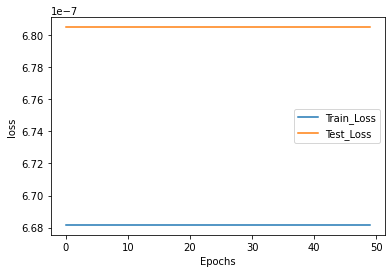

In [ ]:
plt.plot(r1['Epochs'],r1['loss'],label = 'Train_Loss')
plt.plot(r1['Epochs'],r1['val_loss'],label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
ypred_m1 = m1.predict(x_test)
print(ypred_m1)

[[ 9.774955 ]
 [ 6.494317 ]
 [ 7.500722 ]
 [15.196607 ]
 [11.998851 ]
 [ 7.5279717]
 [ 5.7321253]
 [ 4.951407 ]
 [29.483023 ]
 [13.001692 ]
 [ 4.549092 ]
 [11.840783 ]
 [14.848818 ]
 [ 9.431275 ]
 [ 5.2704225]
 [ 9.879222 ]
 [14.0009   ]
 [ 8.775742 ]
 [12.477081 ]
 [ 8.098564 ]
 [ 6.0814557]
 [14.4160185]
 [ 9.067801 ]
 [22.295452 ]
 [25.97045  ]
 [21.114393 ]
 [11.592074 ]
 [ 8.118996 ]
 [10.66233  ]
 [ 6.6592493]
 [ 6.222211 ]
 [ 7.6643925]
 [ 6.0707474]
 [20.020296 ]
 [17.215601 ]
 [28.860184 ]
 [14.28742  ]
 [25.963127 ]
 [ 5.5929465]
 [13.165174 ]
 [ 6.555611 ]
 [ 8.676374 ]
 [ 7.318301 ]
 [ 4.8346596]
 [ 5.27334  ]
 [20.038458 ]
 [ 7.9495673]
 [ 9.067801 ]
 [ 5.521798 ]
 [22.143105 ]
 [ 8.0942   ]
 [ 5.9892235]
 [12.420623 ]
 [ 5.054227 ]
 [19.048925 ]
 [ 5.7002115]
 [13.769642 ]
 [14.564901 ]
 [16.837004 ]
 [24.887566 ]
 [ 6.8130593]
 [ 4.7774   ]
 [ 5.55899  ]
 [10.630552 ]
 [12.754869 ]
 [ 7.8071365]
 [ 5.6385655]
 [ 4.9599776]
 [ 9.114656 ]
 [21.105986 ]
 [19.61843  ]
 [19.5

In [ ]:
print(len(ypred_m1))

480


In [ ]:
#m2 model

In [ ]:
m2 = Sequential()
m2.add(Dense(50, activation='relu', input_dim=(11)))
m2.add(Dense(10,activation='relu'))
m2.add(Dense(1))
m2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
m2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_58 (Dense)            (None, 50)                600       
                                                                 
 dense_59 (Dense)            (None, 10)                510       
                                                                 
 dense_60 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
h2 = m2.fit(x_train,y_train,epochs = 50,validation_data =(x_test,y_test))

Epoch 1/50
35/35 [==============================] - 1s 14ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 2/50
35/35 [==============================] - 0s 7ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 5/50
35/35 [==============================] - 0s 7ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 6.7158e-07 - accuracy: 0.0000e+00 - val_loss: 6.7254e-07 - val_accuracy: 0.0000e+00
Epoch 7/50
35/35 [==============================] - 0s 6ms/step

In [ ]:
r2 = pd.DataFrame(h2.history)
r2['Epochs'] = h2.epoch
r2.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
45,6.715777e-07,0.0,6.725392e-07,0.0,45
46,6.715777e-07,0.0,6.725392e-07,0.0,46
47,6.715777e-07,0.0,6.725392e-07,0.0,47
48,6.715777e-07,0.0,6.725392e-07,0.0,48
49,6.715777e-07,0.0,6.725392e-07,0.0,49


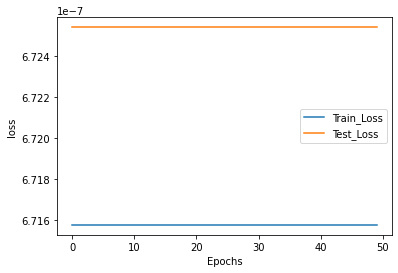

In [ ]:
plt.plot(r2['Epochs'],r2['loss'],label = 'Train_Loss')
plt.plot(r2['Epochs'],r2['val_loss'],label = 'Test_Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
ypred_m2 = m2.predict(x_test)
print(ypred_m2)

[[ 0.9576142 ]
 [ 2.8025014 ]
 [-0.6660137 ]
 [ 2.548912  ]
 [ 2.5784163 ]
 [-0.48556682]
 [ 2.442635  ]
 [ 0.49472153]
 [ 4.7166967 ]
 [-4.267728  ]
 [ 2.60871   ]
 [ 1.4403749 ]
 [-0.471411  ]
 [ 2.604817  ]
 [ 2.459337  ]
 [ 3.0036454 ]
 [ 3.1898177 ]
 [-2.9856439 ]
 [ 3.466321  ]
 [-3.4610217 ]
 [ 3.6894846 ]
 [ 3.466054  ]
 [ 1.9513812 ]
 [ 3.1161623 ]
 [ 3.0839567 ]
 [ 3.9165928 ]
 [ 2.5128796 ]
 [ 3.8912075 ]
 [ 2.4186618 ]
 [ 3.3758407 ]
 [-1.0515076 ]
 [ 2.7725828 ]
 [ 1.5140519 ]
 [ 1.2772279 ]
 [ 1.003272  ]
 [ 2.7181036 ]
 [-0.37129277]
 [ 4.706554  ]
 [ 5.8288293 ]
 [ 4.986917  ]
 [-4.2096343 ]
 [ 4.790545  ]
 [ 1.7829434 ]
 [ 2.8893435 ]
 [ 0.7924871 ]
 [-1.9462564 ]
 [ 2.571893  ]
 [ 2.8794222 ]
 [ 1.0266484 ]
 [ 5.0257435 ]
 [-0.9928032 ]
 [ 2.3579097 ]
 [ 3.313072  ]
 [ 2.01436   ]
 [ 1.0252453 ]
 [ 3.2124386 ]
 [ 2.3464873 ]
 [ 1.011689  ]
 [ 3.9163194 ]
 [-1.6219621 ]
 [ 3.4001532 ]
 [ 0.366399  ]
 [ 0.29248297]
 [ 2.6444192 ]
 [ 4.956841  ]
 [ 2.0970275 ]
 [ 3.89120

In [ ]:
 print(len(ypred_m1))

480
